## Tom Augspurger Dplyr/Pandas comparison (copy of 2016-01-01)

### See result there
http://nbviewer.ipython.org/urls/gist.githubusercontent.com/TomAugspurger/6e052140eaa5fdb6e8c0/raw/627b77addb4bcfc39ab6be6d85cb461e956fb3a3/dplyr_pandas.ipynb

### to reproduce on your WinPython you'll need to get flights.csv  in this directory

This notebook compares [pandas](http://pandas.pydata.org)
and [dplyr](http://cran.r-project.org/web/packages/dplyr/index.html).
The comparison is just on syntax (verbage), not performance. Whether you're an R user looking to switch to pandas (or the other way around), I hope this guide will help ease the transition.

We'll work through the [introductory dplyr vignette](http://cran.r-project.org/web/packages/dplyr/vignettes/introduction.html) to analyze some flight data.

I'm working on a better layout to show the two packages side by side.
But for now I'm just putting the ``dplyr`` code in a comment above each python call.



### using R steps to get flights.csv

un-comment the next cell unless you have installed R and want to get Flights example from the source

to install R on your Winpython:
[how to install R](installing_R.ipynb)


In [52]:
#%load_ext rpy2.ipython
#%R install.packages("nycflights13", repos='http://cran.us.r-project.org')
#%R library(nycflights13)
#%R write.csv(flights, "flights.csv")

### using an internet download to get  flight.qcsv

In [53]:
# Downloading and unzipg a file, without R method :
# source= http://stackoverflow.com/a/34863053/3140336
import io
from zipfile import ZipFile
import requests

def get_zip(file_url):
    url = requests.get(file_url)
    zipfile = ZipFile(io.BytesIO(url.content))
    zip_names = zipfile.namelist()
    if len(zip_names) == 1:
        file_name = zip_names.pop()
        extracted_file = zipfile.open(file_name)
        return extracted_file

url=r'https://github.com/winpython/winpython_afterdoc/raw/master/examples/nycflights13_datas/flights.zip'
with io.open("flights.csv", 'wb') as f:
        f.write(get_zip(url).read())


In [54]:
# Some prep work to get the data from R and into pandas
%matplotlib inline
import matplotlib.pyplot as plt
#%load_ext rpy2.ipython

import pandas as pd
import seaborn as sns

pd.set_option("display.max_rows", 5)

# Data: nycflights13

In [55]:
flights = pd.read_csv("flights.csv", index_col=0)

In [56]:
# dim(flights)   <--- The R code
flights.shape  # <--- The python code

(336776, 16)

In [57]:
# head(flights)
flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


# Single table verbs

``dplyr`` has a small set of nicely defined verbs. I've listed their closest pandas verbs.


<table>
  <tr>
    <td><b>dplyr</b></td>
    <td><b>pandas</b></td>
  </tr>
  <tr>
    <td><code>filter()</code> (and <code>slice()</code>)</td>
    <td><code>query()</code> (and <code>loc[]</code>, <code>iloc[]</code>)</td>
  </tr>
  <tr>
    <td><code>arrange()</code></td>
    <td><code>sort_values</code> and <code>sort_index()</code></td>
  </tr>
  <tr>
  <td><code>select() </code>(and <code>rename()</code>)</td>
    <td><code>__getitem__ </code> (and <code>rename()</code>)</td>
  </tr>
  <tr>
  <td><code>distinct()</code></td>
    <td><code>drop_duplicates()</code></td>
  </tr>
  <tr>
    <td><code>mutate()</code> (and <code>transmute()</code>)</td>
    <td>assign</td>
  </tr>
  <tr>
    <td>summarise()</td>
    <td>None</td>
  </tr>
  <tr>
    <td>sample_n() and sample_frac()</td>
    <td><code>sample</code></td>
  </tr>
  <tr>
    <td><code>%>%</code></td>
    <td><code>pipe</code></td>
  </tr>

</table>


Some of the "missing" verbs in pandas are because there are other, different ways of achieving the same goal. For example `summarise` is spread across `mean`, `std`, etc. It's closest analog is actually the `.agg` method on a `GroupBy` object, as it reduces a DataFrame to a single row (per group). This isn't quite what `.describe` does.

I've also included the `pipe` operator from R (`%>%`), the `pipe` method from pandas, even though it isn't quite a verb.

# Filter rows with filter(), query()

In [58]:
# filter(flights, month == 1, day == 1)
flights.query("month == 1 & day == 1")

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
842,2013,1,1,NaN,NaN,NaN,NaN,B6,N618JB,125,JFK,FLL,NaN,1069,NaN,NaN


We see the first big *language* difference between R and python.
Many python programmers will shun the R code as too magical.
How is the programmer supposed to know that `month` and `day` are supposed to represent columns in the DataFrame?
On the other hand, to emulate this *very* convenient feature of R, python has to write the expression as a string, and evaluate the string in the context of the DataFrame.

The more verbose version:

In [59]:
# flights[flights$month == 1 & flights$day == 1, ]
flights[(flights.month == 1) & (flights.day == 1)]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
842,2013,1,1,NaN,NaN,NaN,NaN,B6,N618JB,125,JFK,FLL,NaN,1069,NaN,NaN


In [60]:
# slice(flights, 1:10)
flights.iloc[:9]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0


# Arrange rows with arrange(), sort()

In [61]:
# arrange(flights, year, month, day) 
flights.sort_values(['year', 'month', 'day'])

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111295,2013,12,31,NaN,NaN,NaN,NaN,UA,NaN,219,EWR,ORD,NaN,719,NaN,NaN
111296,2013,12,31,NaN,NaN,NaN,NaN,UA,NaN,443,JFK,LAX,NaN,2475,NaN,NaN


In [62]:
# arrange(flights, desc(arr_delay))
flights.sort_values('arr_delay', ascending=False)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
7073,2013,1,9,641.0,1301.0,1242.0,1272.0,HA,N384HA,51,JFK,HNL,640.0,4983,6.0,41.0
235779,2013,6,15,1432.0,1137.0,1607.0,1127.0,MQ,N504MQ,3535,JFK,CMH,74.0,483,14.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN
336776,2013,9,30,NaN,NaN,NaN,NaN,MQ,N839MQ,3531,LGA,RDU,NaN,431,NaN,NaN


It's worth mentioning the other common sorting method for pandas DataFrames, `sort_index`. Pandas puts much more emphasis on indicies, (or row labels) than R.
This is a design decision that has positives and negatives, which we won't go into here. Suffice to say that when you need to sort a `DataFrame` by the index, use `DataFrame.sort_index`.

# Select columns with select(), []

In [63]:
# select(flights, year, month, day) 
flights[['year', 'month', 'day']]

,year,month,day
1,2013,1,1
2,2013,1,1
...,...,...,...
336775,2013,9,30
336776,2013,9,30


In [64]:
# select(flights, year:day) 
flights.loc[:, 'year':'day']

,year,month,day
1,2013,1,1
2,2013,1,1
...,...,...,...
336775,2013,9,30
336776,2013,9,30


In [65]:
# select(flights, -(year:day)) 

# No direct equivalent here. I would typically use
# flights.drop(cols_to_drop, axis=1)
# or fligths[flights.columns.difference(pd.Index(cols_to_drop))]
# point to dplyr!

In [66]:
# select(flights, tail_num = tailnum)
flights.rename(columns={'tailnum': 'tail_num'})['tail_num']

1         N14228
2         N24211
           ...  
336775    N511MQ
336776    N839MQ
Name: tail_num, Length: 336776, dtype: object

But like Hadley mentions, not that useful since it only returns the one column. ``dplyr`` and ``pandas`` compare well here.

In [67]:
# rename(flights, tail_num = tailnum)
flights.rename(columns={'tailnum': 'tail_num'})

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tail_num,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN
336776,2013,9,30,NaN,NaN,NaN,NaN,MQ,N839MQ,3531,LGA,RDU,NaN,431,NaN,NaN


Pandas is more verbose, but the the argument to `columns` can be any mapping. So it's often used with a function to perform a common task, say `df.rename(columns=lambda x: x.replace('-', '_'))` to replace any dashes with underscores. Also, ``rename`` (the pandas version) can be applied to the Index.

One more note on the differences here.
Pandas could easily include a `.select` method.
[`xray`](http://xray.readthedocs.org/en/stable/), a library that builds on top of NumPy and pandas to offer labeled N-dimensional arrays (along with many other things) does [just that](http://xray.readthedocs.org/en/stable/indexing.html#indexing-with-labeled-dimensions).
Pandas chooses the `.loc` and `.iloc` accessors because *any valid selection is also a valid assignment*. This makes it easier to modify the data.

```python
flights.loc[:, 'year':'day'] = data
```

where `data` is an object that is, or can be broadcast to, the correct shape.

# Extract distinct (unique) rows 

In [68]:
# distinct(select(flights, tailnum))
flights.tailnum.unique()

array(['N14228', 'N24211', 'N619AA', ..., 'N776SK', 'N785SK', 'N557AS'], dtype=object)

FYI this returns a numpy array instead of a Series.

In [69]:
# distinct(select(flights, origin, dest))
flights[['origin', 'dest']].drop_duplicates()

,origin,dest
1,EWR,IAH
2,LGA,IAH
...,...,...
255456,EWR,ANC
275946,EWR,LGA


OK, so ``dplyr`` wins there from a consistency point of view. ``unique`` is only defined on Series, not DataFrames.

# Add new columns with mutate() 

We at pandas shamelessly stole this for [v0.16.0](http://pandas.pydata.org/pandas-docs/stable/whatsnew.html#whatsnew-0160-enhancements-assign).

In [70]:
# mutate(flights,
#   gain = arr_delay - dep_delay,
#   speed = distance / air_time * 60)

flights.assign(gain=flights.arr_delay - flights.dep_delay,
               speed=flights.distance / flights.air_time * 60)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,gain,speed
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,9.0,370.044053
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,16.0,374.273128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN,NaN,NaN
336776,2013,9,30,NaN,NaN,NaN,NaN,MQ,N839MQ,3531,LGA,RDU,NaN,431,NaN,NaN,NaN,NaN


In [71]:
# mutate(flights,
#   gain = arr_delay - dep_delay,
#   gain_per_hour = gain / (air_time / 60)
# )

(flights.assign(gain=flights.arr_delay - flights.dep_delay)
        .assign(gain_per_hour = lambda df: df.gain / (df.air_time / 60)))


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,gain,gain_per_hour
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,9.0,2.378855
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,16.0,4.229075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN,NaN,NaN
336776,2013,9,30,NaN,NaN,NaN,NaN,MQ,N839MQ,3531,LGA,RDU,NaN,431,NaN,NaN,NaN,NaN


The first example is pretty much identical (aside from the names, `mutate` vs. `assign`).

The second example just comes down to language differences. In `R`, it's possible to implement a function like `mutate` where you can refer to `gain` in the line calcuating `gain_per_hour`, even though `gain` hasn't actually been calcuated yet.

In Python, you can have arbitrary keyword arguments to functions (which we needed for `.assign`), but the order of the argumnets is arbitrary since `dict`s are unsorted and `**kwargs*` is a `dict`. So you can't have something like `df.assign(x=df.a / df.b, y=x **2)`, because you don't know whether `x` or `y` will come first (you'd also get an error saying `x` is undefined.

To work around that with pandas, you'll need to split up the assigns, and pass in a *callable* to the second assign. The callable looks at itself to find a column named `gain`. Since the line above returns a DataFrame with the `gain` column added, the pipeline goes through just fine.

In [72]:
# transmute(flights,
#   gain = arr_delay - dep_delay,
#   gain_per_hour = gain / (air_time / 60)
# )
(flights.assign(gain=flights.arr_delay - flights.dep_delay)
        .assign(gain_per_hour = lambda df: df.gain / (df.air_time / 60))
        [['gain', 'gain_per_hour']])


,gain,gain_per_hour
1,9.0,2.378855
2,16.0,4.229075
...,...,...
336775,NaN,NaN
336776,NaN,NaN


# Summarise values with summarise()

In [73]:
# summarise(flights,
#   delay = mean(dep_delay, na.rm = TRUE))
flights.dep_delay.mean()

12.639070257304708

This is only roughly equivalent.
`summarise` takes a callable (e.g. `mean`, `sum`) and evaluates that on the DataFrame. In pandas these are spread across `pd.DataFrame.mean`, `pd.DataFrame.sum`. This will come up again when we look at `groupby`.

# Randomly sample rows with sample_n() and sample_frac()

In [74]:
# sample_n(flights, 10)
flights.sample(n=10)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
171574,2013,4,7,2005.0,0.0,2350.0,20.0,VX,N848VA,415,JFK,LAX,358.0,2475,20.0,5.0
73795,2013,11,20,1110.0,-5.0,1245.0,-7.0,EV,N730EV,5273,LGA,PIT,55.0,335,11.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204958,2013,5,13,1347.0,122.0,1521.0,101.0,MQ,N520MQ,4646,LGA,MSP,139.0,1020,13.0,47.0
138842,2013,3,3,2123.0,11.0,19.0,5.0,UA,N27722,1225,EWR,PBI,133.0,1023,21.0,23.0


In [75]:
# sample_frac(flights, 0.01)
flights.sample(frac=.01)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
109476,2013,12,29,2139.0,74.0,100.0,80.0,UA,N546UA,314,JFK,LAX,332.0,2475,21.0,39.0
60506,2013,11,6,658.0,-7.0,910.0,-6.0,EV,N13955,3842,EWR,GRR,105.0,605,6.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233373,2013,6,13,3.0,68.0,120.0,61.0,B6,N292JB,112,JFK,BUF,52.0,301,0.0,3.0
213118,2013,5,22,801.0,-2.0,1010.0,-22.0,UA,N76523,1153,LGA,DEN,217.0,1620,8.0,1.0


# Grouped operations 

In [76]:
# planes <- group_by(flights, tailnum)
# delay <- summarise(planes,
#   count = n(),
#   dist = mean(distance, na.rm = TRUE),
#   delay = mean(arr_delay, na.rm = TRUE))
# delay <- filter(delay, count > 20, dist < 2000)

planes = flights.groupby("tailnum")
delay = (planes.agg({"year": "count",
                     "distance": "mean",
                     "arr_delay": "mean"})
               .rename(columns={"distance": "dist",
                                "arr_delay": "delay",
                                "year": "count"})
               .query("count > 20 & dist < 2000"))
delay

,count,dist,delay
tailnum,,,
N0EGMQ,371,676.188679,9.982955
N10156,153,757.947712,12.717241
...,...,...,...
N999DN,61,895.459016,14.311475
N9EAMQ,248,674.665323,9.235294


For me, dplyr's ``n()`` looked is a bit starge at first, but it's already growing on me.

I think pandas is more difficult for this particular example.
There isn't as natural a way to mix column-agnostic aggregations (like ``count``) with column-specific aggregations like the other two. You end up writing could like `.agg{'year': 'count'}` which reads, "I want the count of `year`", even though you don't care about `year` specifically. You could just as easily have said `.agg('distance': 'count')`.
Additionally assigning names can't be done as cleanly in pandas; you have to just follow it up with a ``rename`` like before.

We may as well reproduce the graph. It looks like `ggplots` `geom_smooth` is some kind of lowess smoother. We can either us [seaborn](http://stanford.edu/~mwaskom/software/seaborn/):

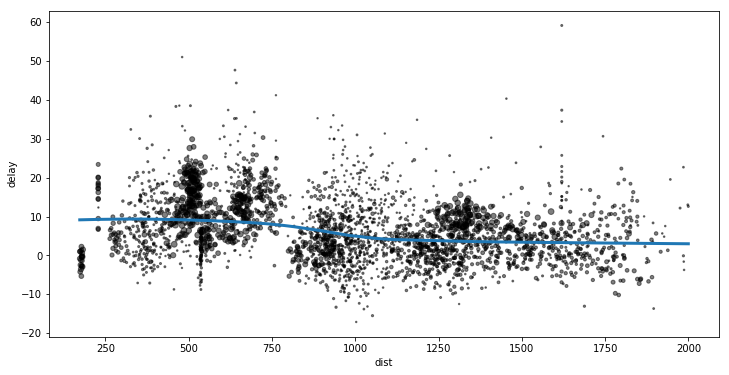

In [77]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.regplot("dist", "delay", data=delay, lowess=True, ax=ax,
            scatter_kws={'color': 'k', 'alpha': .5, 's': delay['count'] / 10}, ci=90,
            line_kws={'linewidth': 3});

Or using statsmodels directly for more control over the lowess, with an extremely lazy
"confidence interval".

In [78]:
import statsmodels.api as sm

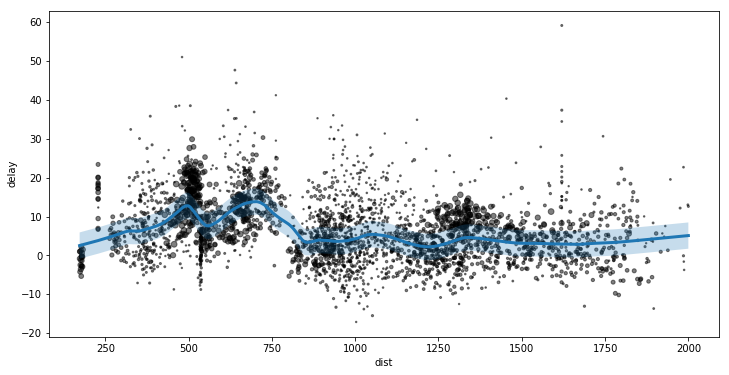

In [79]:
smooth = sm.nonparametric.lowess(delay.delay, delay.dist, frac=1/8)
ax = delay.plot(kind='scatter', x='dist', y = 'delay', figsize=(12, 6),
                color='k', alpha=.5, s=delay['count'] / 10)
ax.plot(smooth[:, 0], smooth[:, 1], linewidth=3);
std = smooth[:, 1].std()
ax.fill_between(smooth[:, 0], smooth[:, 1] - std, smooth[:, 1] + std, alpha=.25);

In [80]:
# destinations <- group_by(flights, dest)
# summarise(destinations,
#   planes = n_distinct(tailnum),
#   flights = n()
# )

destinations = flights.groupby('dest')
destinations.agg({
    'tailnum': lambda x: len(x.unique()),
    'year': 'count'
    }).rename(columns={'tailnum': 'planes',
                       'year': 'flights'})

,planes,flights
dest,,
ABQ,108,254
ACK,58,265
...,...,...
TYS,273,631
XNA,176,1036


There's a little know feature to `groupby.agg`: it accepts a dict of dicts mapping
columns to `{name: aggfunc}` pairs. Here's the result:

In [81]:
destinations = flights.groupby('dest')
r = destinations.agg({'tailnum': {'planes': lambda x: len(x.unique())},
                      'year': {'flights': 'count'}})
r

C:\Program Files\WinPython-64bit-3.6.5.0\python-3.6.5.amd64\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,tailnum,year
,planes,flights
dest,,
ABQ,108,254
ACK,58,265
...,...,...
TYS,273,631
XNA,176,1036


The result is a `MultiIndex` in the columns which can be a bit awkard to work with (you can drop a level with `r.columns.droplevel()`). Also the syntax going into the `.agg` may not be the clearest.

Similar to how ``dplyr`` provides optimized C++ versions of most of the `summarise` functions, pandas uses [cython](http://cython.org) optimized versions for most of the `agg` methods.

In [82]:
# daily <- group_by(flights, year, month, day)
# (per_day   <- summarise(daily, flights = n()))

daily = flights.groupby(['year', 'month', 'day'])
per_day = daily['distance'].count()
per_day

year  month  day
2013  1      1      842
             2      943
                   ... 
      12     30     968
             31     776
Name: distance, Length: 365, dtype: int64

In [83]:
# (per_month <- summarise(per_day, flights = sum(flights)))
per_month = per_day.groupby(level=['year', 'month']).sum()
per_month

year  month
2013  1        27004
      2        24951
               ...  
      11       27268
      12       28135
Name: distance, Length: 12, dtype: int64

In [84]:
# (per_year  <- summarise(per_month, flights = sum(flights)))
per_year = per_month.sum()
per_year

336776

I'm not sure how ``dplyr`` is handling the other columns, like `year`, in the last example. With pandas, it's clear that we're grouping by them since they're included in the groupby. For the last example, we didn't group by anything, so they aren't included in the result.

# Chaining

Any follower of Hadley's [twitter account](https://twitter.com/hadleywickham/) will know how much R users *love* the ``%>%`` (pipe) operator. And for good reason!

In [85]:
# flights %>%
#   group_by(year, month, day) %>%
#   select(arr_delay, dep_delay) %>%
#   summarise(
#     arr = mean(arr_delay, na.rm = TRUE),
#     dep = mean(dep_delay, na.rm = TRUE)
#   ) %>%
#   filter(arr > 30 | dep > 30)
(
flights.groupby(['year', 'month', 'day'])
    [['arr_delay', 'dep_delay']]
    .mean()
    .query('arr_delay > 30 | dep_delay > 30')
)

arr_delay  dep_delay
year month day                      
2013 1     16   34.247362  24.612865
           31   32.602854  28.658363
...                   ...        ...
     12    17   55.871856  40.705602
           23   32.226042  32.254149

[49 rows x 2 columns]

A bit of soapboxing here if you'll indulge me.

The example above is a bit contrived since it only uses methods on `DataFrame`. But what if you have some function to work into your pipeline that pandas hasn't (or won't) implement? In that case you're required to break up your pipeline by assigning your intermediate (probably uninteresting) DataFrame to a temporary variable you don't actually care about.

`R` doesn't have this problem since the `%>%` operator works with any function that takes (and maybe returns) DataFrames.
The python language doesn't have any notion of right to left function application (other than special cases like `__radd__` and `__rmul__`).
It only allows the usual left to right `function(arguments)`, where you can think of the `()` as the "call this function" operator.

Pandas wanted something like `%>%` and we did it in a farily pythonic way. The `pd.DataFrame.pipe` method takes a function and optionally some arguments, and calls that function with `self` (the DataFrame) as the first argument.

So

```R
flights >%> my_function(my_argument=10)
```

becomes

```python
flights.pipe(my_function, my_argument=10)
```

We initially had grander visions for `.pipe`, but the wider python community didn't seem that interested.

# Other Data Sources

Pandas has tons [IO tools](http://pandas.pydata.org/pandas-docs/version/0.15.0/io.html) to help you get data in and out, including SQL databases via [SQLAlchemy](http://www.sqlalchemy.org).

# Summary

I think pandas held up pretty well, considering this was a vignette written for dplyr. I found the degree of similarity more interesting than the differences. The most difficult task was renaming of columns within an operation; they had to be followed up with a call to ``rename`` *after* the operation, which isn't that burdensome honestly.

More and more it looks like we're moving towards future where being a language or package partisan just doesn't make sense. Not when you can load up a [Jupyter](http://jupyter.org) (formerly IPython) notebook to call up a library written in R, and hand those results off to python or Julia or whatever for followup, before going back to R to make a cool [shiny](http://shiny.rstudio.com) web app.

There will always be a place for your "utility belt" package like dplyr or pandas, but it wouldn't hurt to be familiar with both.

If you want to contribute to pandas, we're always looking for help at https://github.com/pydata/pandas/.
You can get ahold of me directly on [twitter](https://twitter.com/tomaugspurger).